In [3]:
import os 
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
import imutils

Testing


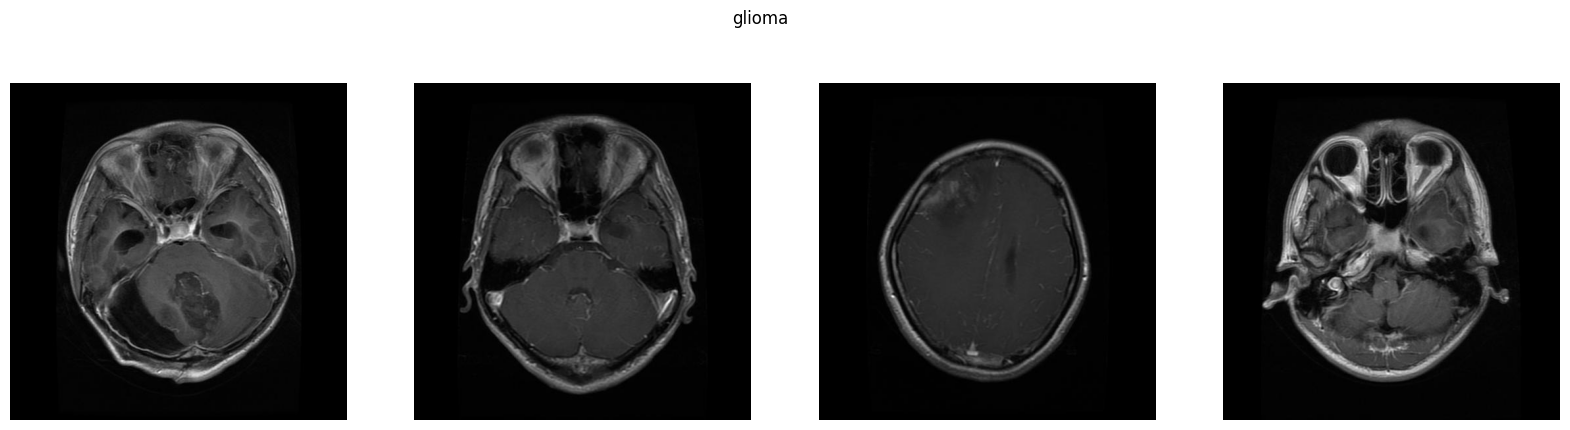

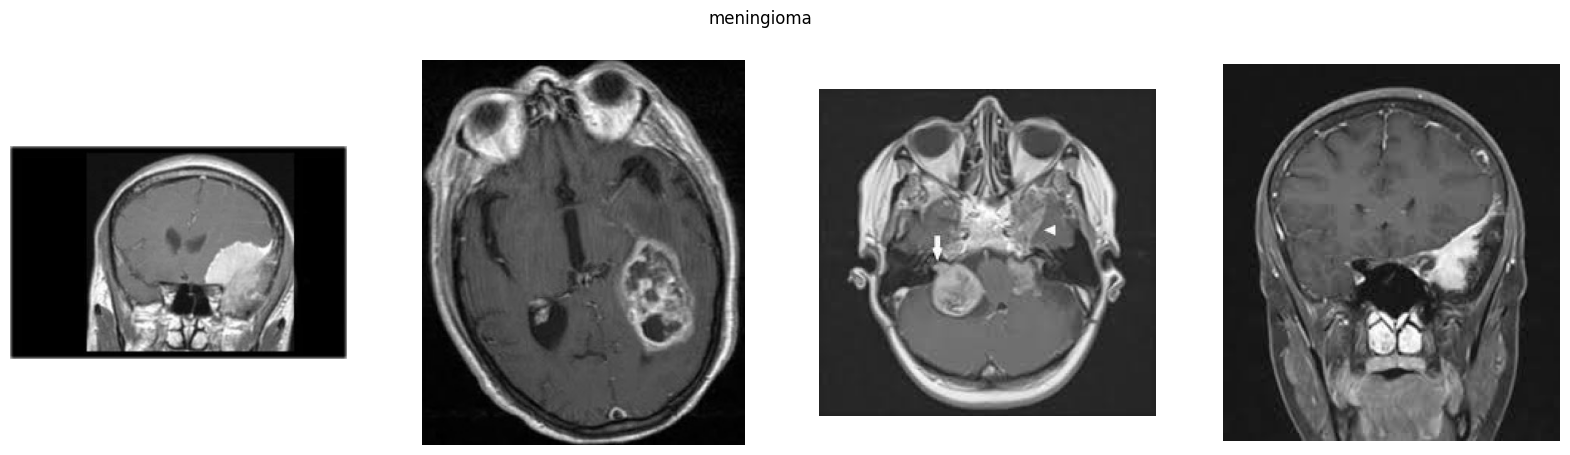

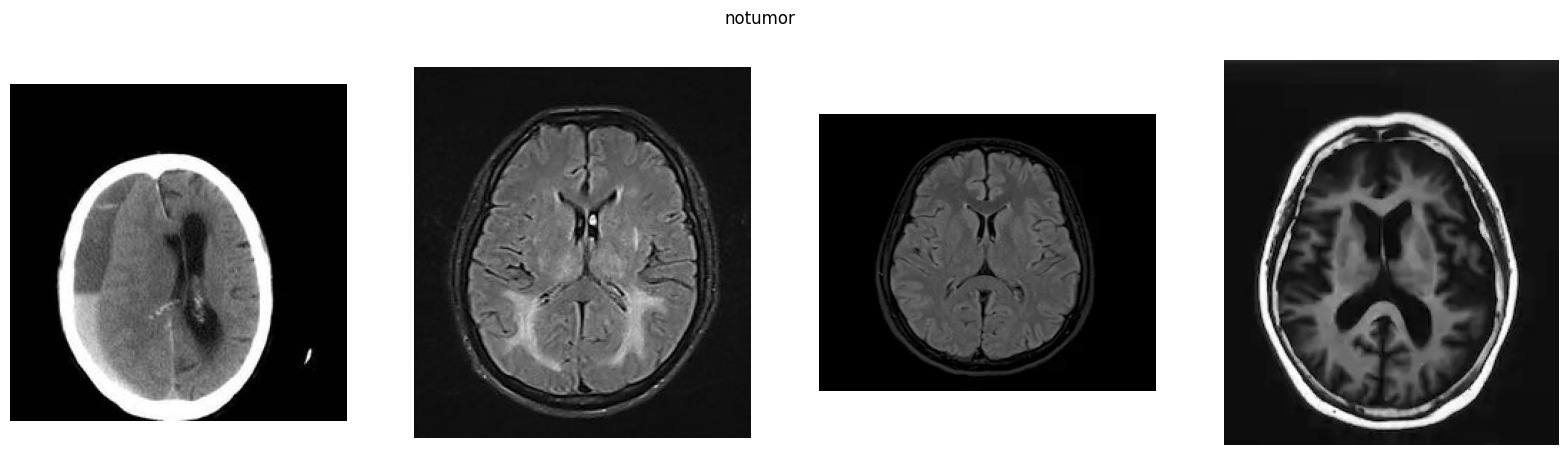

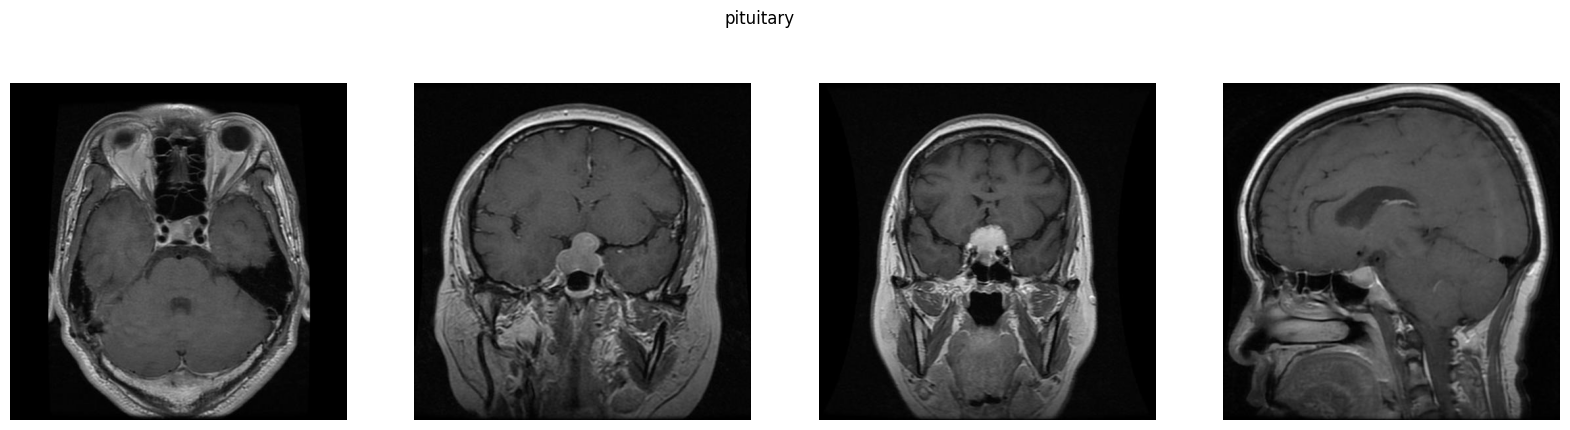

Training


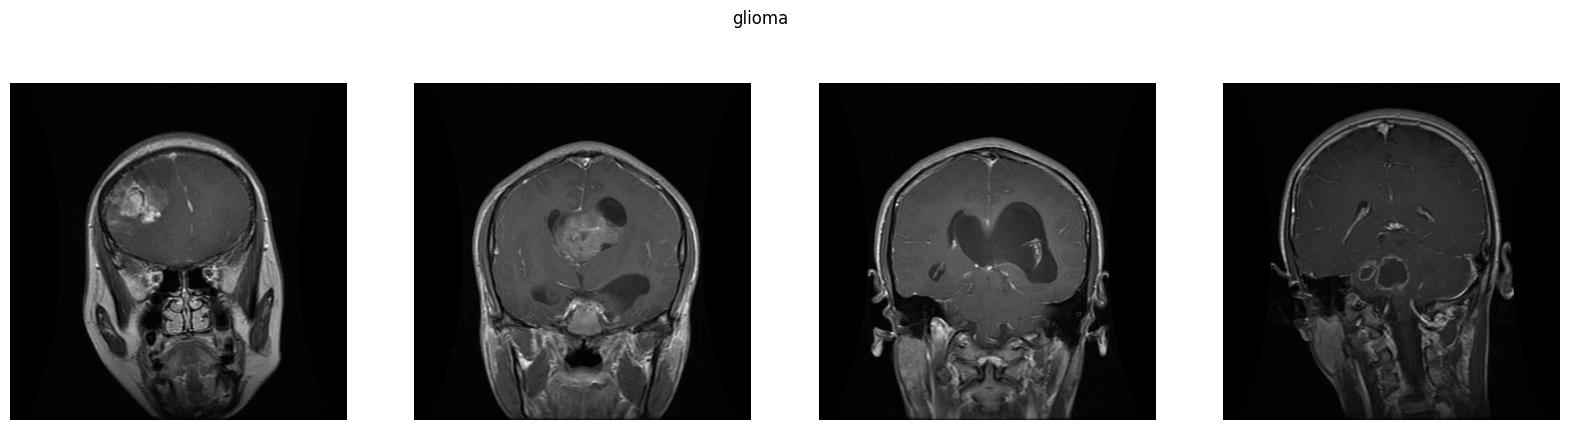

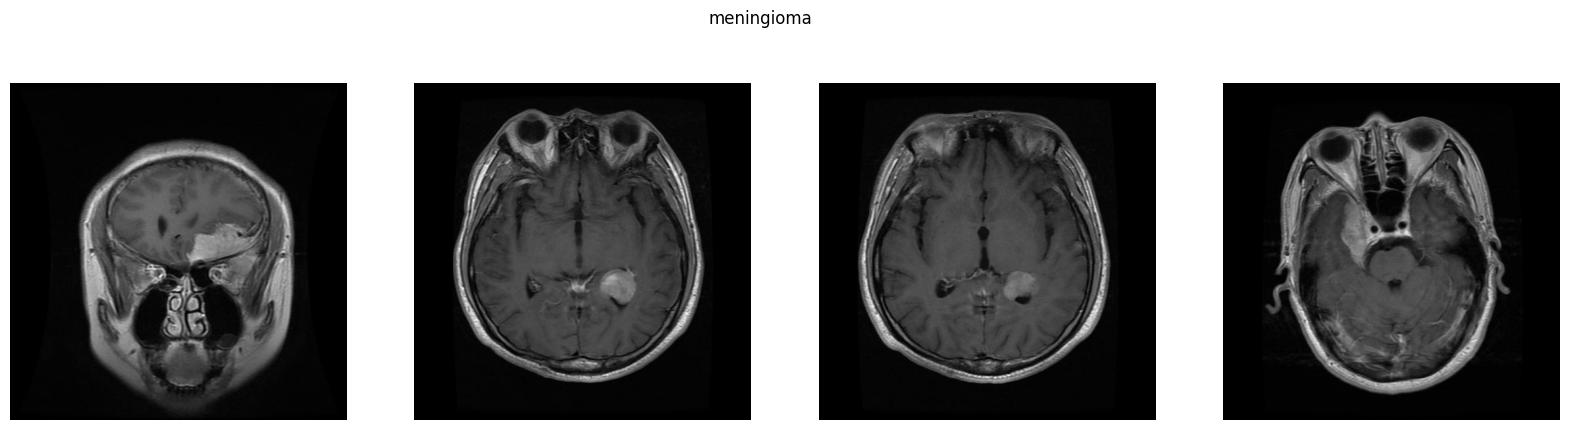

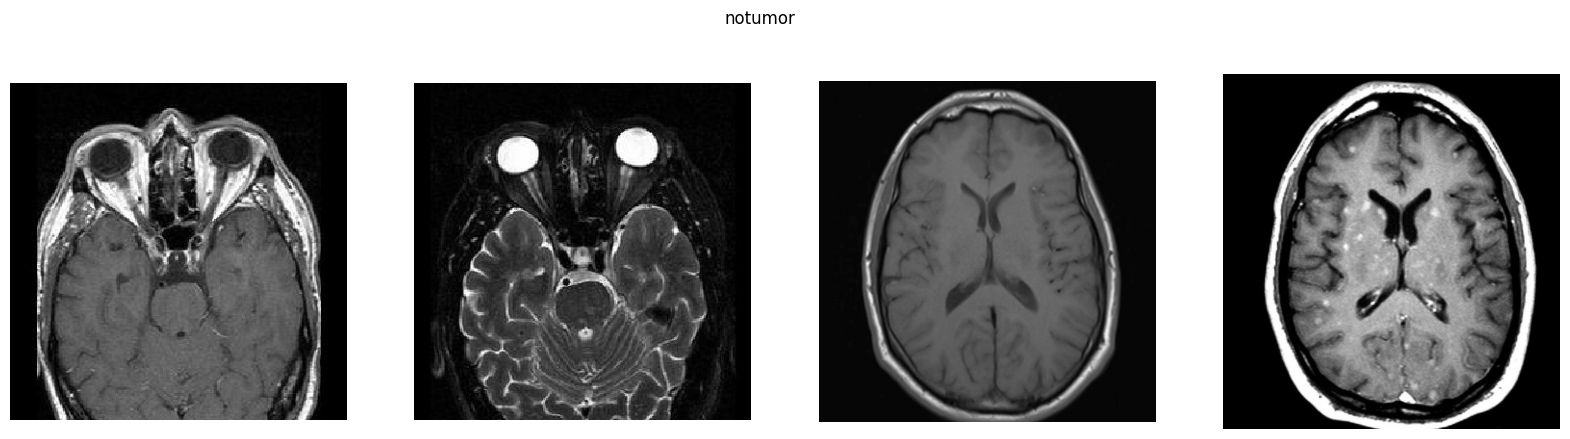

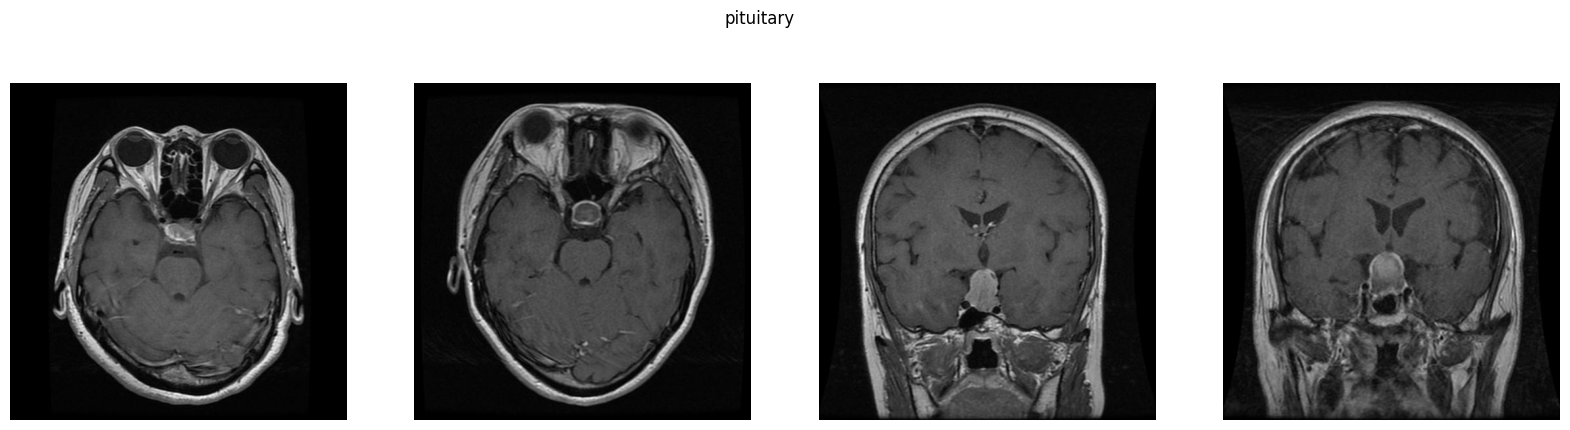

In [20]:
# Displayning the images
path ="Brain_Tumor_MRI_Dataset"

for file in os.listdir(path):
        print(file)
        for TumorType in os.listdir(os.path.join(path,file)):
            fig, axes = plt.subplots(1, 4, figsize=(20, 5))
            fig.suptitle(TumorType)
            for i, image in enumerate(os.listdir(os.path.join(path,file,TumorType))):
                if i >= 4:  # Only show first 4 images
                    break
                img = cv2.imread(os.path.join(path,file,TumorType,image))
                axes[i].imshow(img)
                axes[i].axis('off')
            plt.show()



In [21]:
image_shapes = set()
for file in os.listdir(path):
    for TumorType in os.listdir(os.path.join(path,file)):
        for image in os.listdir(os.path.join(path,file,TumorType)):
            img = cv2.imread(os.path.join(path,file,TumorType,image))
            image_shapes.add(img.shape)

In [22]:
print(image_shapes)
print(len(image_shapes))

{(395, 367, 3), (290, 236, 3), (717, 717, 3), (302, 216, 3), (245, 206, 3), (512, 434, 3), (250, 201, 3), (274, 230, 3), (442, 442, 3), (228, 233, 3), (480, 853, 3), (484, 405, 3), (248, 208, 3), (417, 428, 3), (344, 320, 3), (273, 236, 3), (236, 236, 3), (244, 206, 3), (470, 469, 3), (214, 229, 3), (496, 453, 3), (216, 234, 3), (439, 645, 3), (395, 416, 3), (236, 255, 3), (342, 323, 3), (257, 235, 3), (1080, 1920, 3), (340, 507, 3), (222, 233, 3), (260, 314, 3), (486, 421, 3), (512, 416, 3), (270, 250, 3), (415, 339, 3), (301, 275, 3), (243, 207, 3), (903, 721, 3), (300, 227, 3), (372, 341, 3), (592, 562, 3), (282, 230, 3), (225, 209, 3), (306, 278, 3), (361, 642, 3), (355, 330, 3), (228, 236, 3), (213, 210, 3), (872, 850, 3), (223, 224, 3), (248, 200, 3), (218, 234, 3), (320, 497, 3), (320, 257, 3), (248, 257, 3), (365, 306, 3), (613, 605, 3), (239, 236, 3), (354, 298, 3), (258, 300, 3), (280, 236, 3), (201, 173, 3), (228, 228, 3), (480, 480, 3), (198, 150, 3), (244, 201, 3), (234, 2

There are 387 unique image shapes in the dataset. We need to resize all the images into a single shape.
We are choosing 256 for cropped image size.

## Image presrocessing steps: 

1. Image cropping:
Find the biggest contour of the original image. Then Find the extreme points for cropping and crop it.

2. Noise Removal:
Noise removal is performed using a bilateral filter. Bilateral filter is effective for MRI images becouse it can smooth the image while preserving edges and fine-details.

3. Applying the colormap:
The next step involves applying a colormap to the images.Colormap enhances the interpritibility of MRI scans by improving the contrast between different tisues or structures of the brain.

4. Image resizing: The final step is to perform resizing of the images , which is esscential for standarizing the input size of images fed into the model.

In [23]:
def crop_img(img):
	"""
	Finds the extreme points on the image and crops the rectangular out of them
	"""
	gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
	gray = cv2.GaussianBlur(gray, (3, 3), 0)

	# threshold the image, then perform a series of erosions +
	# dilations to remove any small regions of noise
	thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
	thresh = cv2.erode(thresh, None, iterations=2)
	thresh = cv2.dilate(thresh, None, iterations=2)

	# find contours in thresholded image, then grab the largest one
	cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	c = max(cnts, key=cv2.contourArea)

	# find the extreme points
	extLeft = tuple(c[c[:, :, 0].argmin()][0])
	extRight = tuple(c[c[:, :, 0].argmax()][0])
	extTop = tuple(c[c[:, :, 1].argmin()][0])
	extBot = tuple(c[c[:, :, 1].argmax()][0])
	ADD_PIXELS = 0
	new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
	
	return new_img

cropped the training and testing data and save in a folder

In [25]:
train_path = "Brain_Tumor_MRI_Dataset/Training"
test_path = "Brain_Tumor_MRI_Dataset/Testing"
save_dir = "Dataset_crop"
img_size=256


def preprocess(data_path,dataset_type,save_dir):
    for TumorType in os.listdir(data_path):
        TumorType_path = os.path.join(data_path,TumorType)
        for image in os.listdir(TumorType_path):
            image_path = os.path.join(TumorType_path,image)
            img = cv2.imread(image_path)
            if img is None :
                continue
            img = crop_img(img)
            img =cv2.resize(img,(img_size,img_size))
            save_path = os.path.join(save_dir,dataset_type,TumorType)
            os.makedirs(save_path,exist_ok=True)

            cv2.imwrite(os.path.join(save_path,image),img)
    print(f"Data preprocessing complete for {dataset_type} \n saved folder {save_dir}/{dataset_type}")

preprocess(train_path,"Training",save_dir)
preprocess(test_path,"Testing",save_dir)


Data preprocessing complete for Training 
 saved folder Dataset_crop/Training
Data preprocessing complete for Testing 
 saved folder Dataset_crop/Testing
